In [97]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import random
import shutil

[51, 60, 58]

In [2]:
dataDir = './data/celeba'
imgDir = os.path.join('./data/celeba/img_align_celeba')
os.listdir('./data/celeba')


['list_attr_celeba.txt',
 'img_align_celeba.zip',
 'list_bbox_celeba.txt',
 'list_landmarks_celeba.txt',
 'list_eval_partition.txt',
 'img_align_celeba',
 'list_landmarks_align_celeba.txt',
 'identity_CelebA.txt',
 '.DS_Store',
 'celeba2']

In [3]:
identityFile = os.path.join(dataDir, 'list_attr_celeba.txt')
with open(identityFile, 'r') as f:
    identity = f.read()
f.close()
print('Ready')
identity = identity.split('\n')

Ready
202599


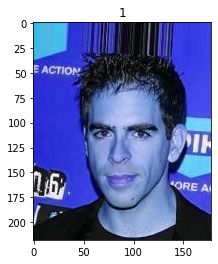

./data/celeba/img_align_celeba/181893.jpg
181893.jpg


In [71]:
# Validation that we can identify male/female
imNum = random.sample(range(len(allIms)),1)[0]
imPath = os.path.join(imgDir, identity[imNum].split()[0])
im = cv2.imread(imPath)
mf = identity[imNum].split()[21]
plt.figure()
plt.imshow(im)
plt.title(mf)
plt.show()

print(imPath)
print(identity[imNum].split()[0])

In [84]:
# Convert to dictionary so we can move over sample files
mfDict = {}
num2Mf = {'1':'Male','-1':'Female'}
for imNum in range(len(allIms)):
    imName = identity[imNum+2].split()[0]
    mf = identity[imNum+2].split()[21]
    mf = num2Mf[mf]
    
    mfDict[imName] = mf

In [101]:
os.makedirs('./data/celeba/celeba2Sample/male')
os.makedirs('./data/celeba/celeba2Sample/female')
os.listdir('./data/celeba/celeba2Sample')

['female', 'male']

In [111]:
femaleDir = './data/celeba/celeba2Sample/female'
maleDir = './data/celeba/celeba2Sample/male'

random.seed(1234)
imNums = random.sample(range(len(allIms)),500)
for imNum in imNums:
    imName = identity[imNum+2].split()[0]
    imLocation = os.path.join(imgDir,imName)
    if mfDict[imName] == 'Male':
        newLocation = os.path.join(maleDir, imName)
        assert not os.path.isfile(newLocation), "File exists"
        print('Copying {} to {}'.format(imLocation, newLocation))
        shutil.copyfile(imLocation, newLocation)
        
    else:
        newLocation = os.path.join(femaleDir, imName)
        assert not os.path.isfile(newLocation), "File exists"
        print('Copying {} to {}'.format(imLocation, newLocation))
        shutil.copyfile(imLocation, newLocation)

AssertionError: File exists